cd /c/Learning/Phd/BART/bartpy/bart-playground

In [1]:
from params import TreeParams
import numpy as np

In [2]:
tree = TreeParams()
print("Initialized TreeParams:")
print(tree)

# Manually set tree split variables, thresholds, and leaf values
tree.vars = np.array([0, -1, -1], dtype=int)  # Root node splitting variable
tree.thresholds = np.array([0.5, np.nan, np.nan])  # Root node splitting threshold
tree.leaf_vals = np.array([np.nan, 1.0, -1.0])  # Values for left and right leaf nodes

print(tree)

# Test the tree traversal functionality
# Example input matrix
X_test = np.array([
    [0.4],  # Should go to the left child (<= 0.5)
    [0.6],  # Should go to the right child (> 0.5)
    [0.7],
])

# Predict which leaf node each sample belongs to
node_ids = tree.traverse_tree(X_test)
print(f"Node IDs for samples:\n{node_ids}")

# Validate that each sample is correctly assigned to its leaf node
assert node_ids[0] == 1, "Test sample 1 failed!"
assert node_ids[1] == 2, "Test sample 2 failed!"
print("traverse_tree test passed!")

Initialized TreeParams:
Val: nan (leaf, n = -2)
X_0 <= 0.500 (split, n = -2)
	Val: 1.000 (leaf, n = -2)
	Val: -1.000 (leaf, n = -2)
Node IDs for samples:
[1 2 2]
traverse_tree test passed!


In [3]:
# Evaluate the tree for the test samples
outputs = tree.evaluate(X_test)
print(f"Evaluated outputs for the samples:\n{outputs}")

# Validate the output values
assert outputs[0] == 1.0, "Evaluation failed for sample 1!"
assert outputs[1] == -1.0, "Evaluation failed for sample 2!"
print("evaluate test passed!")

Evaluated outputs for the samples:
[ 1. -1. -1.]
evaluate test passed!


In [4]:
# Initialize TreeParams
tree = TreeParams()
print("Initialized TreeParams:")
print(tree)

# Split the root node (index 0) into two child nodes
split_index = 0  # Root node index
var = 0  # Variable to split on
threshold = 0.5  # Split threshold
left_val = 1.0  # Value for the left leaf node
right_val = -1.0  # Value for the right leaf node

# Perform the split
tree.split_leaf(split_index, var, threshold, left_val, right_val)

# Verify the tree structure after the split
print("Tree structure after splitting root node:")
print(tree)

# Validate the split operation
assert tree.vars[split_index] == var, "Root node variable was not set correctly!"
assert tree.thresholds[split_index] == threshold, "Root node threshold was not set correctly!"
assert tree.vars[split_index * 2 + 1] == -1, "Left child was not set as a leaf!"
assert tree.vars[split_index * 2 + 2] == -1, "Right child was not set as a leaf!"
assert tree.leaf_vals[split_index * 2 + 1] == left_val, "Left leaf value was not set correctly!"
assert tree.leaf_vals[split_index * 2 + 2] == right_val, "Right leaf value was not set correctly!"
assert tree.n_vals[split_index * 2 + 1] == -2, "Left child n_vals was not updated correctly!"
assert tree.n_vals[split_index * 2 + 2] == -2, "Right child n_vals was not updated correctly!"

print("split_leaf test passed!")


Initialized TreeParams:
Val: nan (leaf, n = -2)
Tree structure after splitting root node:
X_0 <= 0.500 (split, n = -2)
	Val: 1.000 (leaf, n = -2)
	Val: -1.000 (leaf, n = -2)
split_leaf test passed!


In [5]:
# Initialize TreeParams and set up a tree structure
tree = TreeParams()

# Manually set up a split node with two leaf children
tree.vars = np.array([0, -1, -1, -2, -2, -2, -2, -2], dtype=int)  # Root splits on variable 0
tree.thresholds = np.array([0.5, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])  # Split threshold
tree.leaf_vals = np.array([np.nan, 1.0, -1.0, np.nan, np.nan, np.nan, np.nan, np.nan])  # Leaf node values
tree.n_vals = np.array([-2, 100, 50, -2, -2, -2, -2, -2], dtype=int)  # Sample counts at nodes

# Display the initial tree structure
print("Initial tree structure:")
print(tree)

# Prune the root split node (index 0)
prune_index = 0
tree.prune_split(prune_index)

# Display the tree structure after pruning
print("\nTree structure after pruning:")
print(tree)

# Validate the pruning operation
assert tree.vars[prune_index] == -1, "Pruned node is not a leaf!"
assert np.isnan(tree.thresholds[prune_index]), "Threshold of pruned node was not cleared!"
assert tree.vars[1] == -2, "Left child was not cleared after pruning!"
assert tree.vars[2] == -2, "Right child was not cleared after pruning!"
print("\nPrune split test passed!")

Initial tree structure:
X_0 <= 0.500 (split, n = -2)
	Val: 1.000 (leaf, n = 100)
	Val: -1.000 (leaf, n = 50)

Tree structure after pruning:
Val: nan (leaf, n = -2)

Prune split test passed!


In [6]:
# Initialize TreeParams
tree = TreeParams()
print("Initialized TreeParams:")
print(tree)

# Split the root node (index 0) into two child nodes
split_index = 0  # Root node index
var = 0  # Variable to split on
threshold = 0.5  # Split threshold
left_val = 1.0  # Initial value for the left leaf node
right_val = -1.0  # Initial value for the right leaf node

# Perform the split
tree.split_leaf(split_index, var, threshold, left_val, right_val)

# Set a new value for the left leaf (index 1)
new_left_val = 2.0
left_leaf_index = split_index * 2 + 1
tree.set_leaf_value(left_leaf_index, new_left_val)

# Verify the tree structure after updating the leaf value
print("\nTree structure after updating the left leaf value:")
print(tree)

# Validate the set_leaf_value operation
assert tree.is_leaf(left_leaf_index), "The specified node is not a leaf!"
assert tree.leaf_vals[left_leaf_index] == new_left_val, "The leaf value was not updated correctly!"

print("set_leaf_value operation validated successfully!")

Initialized TreeParams:
Val: nan (leaf, n = -2)

Tree structure after updating the left leaf value:
X_0 <= 0.500 (split, n = -2)
	Val: 2.000 (leaf, n = -2)
	Val: -1.000 (leaf, n = -2)
set_leaf_value operation validated successfully!


In [7]:
# Initialize TreeParams
tree = TreeParams()

# Split the root node (index 0)
tree.split_leaf(0, var=0, split_threshold=0.5, left_val=1.0, right_val=np.nan)

# Split the right child of the root (index 2)
tree.split_leaf(2, var=1, split_threshold=0.7, left_val=2.0, right_val=-2.0)

# Display the constructed tree
print("Constructed tree structure:")
print(tree)

Constructed tree structure:
X_0 <= 0.500 (split, n = -2)
	Val: 1.000 (leaf, n = -2)
	X_1 <= 0.700 (split, n = -2)
		Val: 2.000 (leaf, n = -2)
		Val: -2.000 (leaf, n = -2)


In [8]:
# Test is_leaf function
assert tree.is_leaf(1), "Node 1 should be a leaf but is not!"
assert tree.is_leaf(5), "Node 5 should be a leaf but is not!"
assert tree.is_leaf(6), "Node 6 should be a leaf but is not!"
assert not tree.is_leaf(0), "Node 0 should not be a leaf but is incorrectly marked as one!"
assert not tree.is_leaf(2), "Node 2 should not be a leaf but is incorrectly marked as one!"
print("is_leaf function validated successfully!")

is_leaf function validated successfully!


In [9]:
# Test is_split_node function
assert tree.is_split_node(0), "Node 0 should be a split node but is not!"
assert tree.is_split_node(2), "Node 2 should be a split node but is not!"
assert not tree.is_split_node(1), "Node 1 should not be a split node but is incorrectly marked as one!"
assert not tree.is_split_node(5), "Node 5 should not be a split node but is incorrectly marked as one!"
print("is_split_node function validated successfully!")

is_split_node function validated successfully!


In [10]:
# Test is_terminal_split_node function
assert not tree.is_terminal_split_node(0), "Node 0 should not be a terminal split node but is incorrectly marked as one!"
assert tree.is_terminal_split_node(2), "Node 2 should be a terminal split node but is not!"
print("is_terminal_split_node function validated successfully!")

is_terminal_split_node function validated successfully!


In [11]:
# Test get_n_leaves function
expected_n_leaves = 3  # Nodes 1, 5, and 6 are leaves
actual_n_leaves = tree.get_n_leaves()

assert actual_n_leaves == expected_n_leaves, f"Expected {expected_n_leaves} leaves, but got {actual_n_leaves}!"
print(f"get_n_leaves function validated successfully! Total leaves: {actual_n_leaves}")

get_n_leaves function validated successfully! Total leaves: 3


In [12]:
# Initialize TreeParams
tree = TreeParams()
print("Initialized TreeParams:")
print(tree)

# Manually set up a larger tree structure
# Root node splits
tree.vars = np.array([0, 1, 1, -1, -1, -1, -1], dtype=int)  # Non-leaf and leaf nodes
tree.thresholds = np.array([0.5, 0.3, 0.7, np.nan, np.nan, np.nan, np.nan])  # Thresholds for splits
tree.leaf_vals = np.array([np.nan, np.nan, np.nan, 1.0, -1.0, 2.0, -2.0])  # Leaf node values

# This tree structure:
# - Root splits on variable 0 at 0.5
# - Left child (index 1) splits on variable 1 at 0.3
# - Right child (index 2) splits on variable 1 at 0.7
# - Indices 3, 4, 5, 6 are leaf nodes

# Use a random generator for reproducibility
rng = np.random.default_rng(seed=42)

# Get a random terminal split node
try:
    random_terminal_split = tree.get_random_terminal_split(rng)
    print(f"Randomly selected terminal split node index: {random_terminal_split}")

    # Validate that the selected node is a terminal split
    assert tree.vars[random_terminal_split] != -1, "Selected node is not a split!"
    assert tree.vars[random_terminal_split * 2 + 1] == -1, "Left child is not a leaf!"
    assert tree.vars[random_terminal_split * 2 + 2] == -1, "Right child is not a leaf!"
    # Print the tree structure for visualization
    print("Tree structure:")
    print(tree)
    print("get_random_terminal_split test passed!")
except ValueError as e:
    print(f"Error: {e}")
    print("No terminal splits available in the current tree structure.")

Initialized TreeParams:
Val: nan (leaf, n = -2)
Randomly selected terminal split node index: 1
Tree structure:
X_0 <= 0.500 (split, n = -2)
	X_1 <= 0.300 (split, n = -2)
		Val: 1.000 (leaf, n = -2)
		Val: -1.000 (leaf, n = -2)
	X_1 <= 0.700 (split, n = -2)
		Val: 2.000 (leaf, n = -2)
		Val: -2.000 (leaf, n = -2)
get_random_terminal_split test passed!


In [13]:
# Initialize TreeParams and manually set up a tree structure
tree = TreeParams()
print("Initialized TreeParams:")
print(tree)

# Manually set up the tree with split variables and leaf nodes
tree.vars = np.array([0, -1, -1], dtype=int)  # Root node splits on variable 0
tree.thresholds = np.array([0.5, np.nan, np.nan])  # Root node split threshold
tree.leaf_vals = np.array([np.nan, 1.0, -1.0])  # Values for left and right leaf nodes

# Use a random generator for reproducibility
rng = np.random.default_rng(seed=0)

# Get a random leaf node
random_leaf = tree.get_random_leaf(rng)
print(f"Randomly selected leaf node index: {random_leaf}")

# Validate that the selected node is indeed a leaf
assert tree.vars[random_leaf] == -1, "Selected node is not a leaf!"
print("get_random_leaf test passed!")

Initialized TreeParams:
Val: nan (leaf, n = -2)
Randomly selected leaf node index: 2
get_random_leaf test passed!


In [14]:
# Initialize TreeParams
tree = TreeParams()

# Define the tree structure manually
tree.vars = np.array([0, -1, 1, -2, -2, -1, -1, -2], dtype=int)  # -1 for leaf, 0/1 for split variables
tree.thresholds = np.array([0.5, np.nan, 0.7, np.nan, np.nan, np.nan, np.nan, np.nan])  # Split thresholds
tree.leaf_vals = np.array([np.nan, 1.0, np.nan, np.nan, np.nan, 2.0, -2.0, np.nan])  # Values for leaf nodes
tree.n_vals = np.array([-2, 100, -2, -2, -2, 50, 50, -2], dtype=int)  # Sample counts at nodes

# Display the constructed tree
print("Constructed tree structure:")
print(tree)

# Test get_random_split function
# Use a random generator for reproducibility
rng = np.random.default_rng(seed=42)

# Get a random split node
try:
    random_split = tree.get_random_split(rng)
    print(f"Randomly selected split node index: {random_split}")

    # Validate that the selected node is indeed a split node
    assert tree.is_split_node(random_split), \
        f"Node {random_split} is not a split node but was selected as one!"
    print("get_random_split function validated successfully!")
except ValueError as e:
    print(f"Error: {e}")
    print("No split nodes available in the current tree structure.")

Constructed tree structure:
X_0 <= 0.500 (split, n = -2)
	Val: 1.000 (leaf, n = 100)
	X_1 <= 0.700 (split, n = -2)
		Val: 2.000 (leaf, n = 50)
		Val: -2.000 (leaf, n = 50)
Randomly selected split node index: 0
get_random_split function validated successfully!


# Visualization

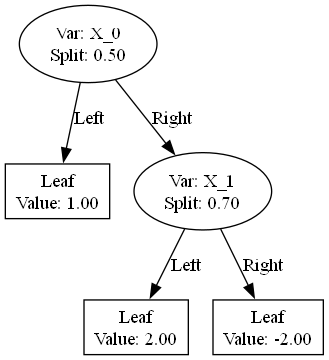

In [1]:
# Import necessary libraries
from graphviz import Digraph
from visualization import visualize_tree  # Replace with the correct filename
import numpy as np

# Define the tree structure and parameters manually
class TreeStructure:
    """
    Mock class to mimic tree structure for visualization.
    """
    def __init__(self):
        self.var = np.array([0, -1, 1, -2, -2, -1, -1], dtype=int)  # -1: Leaf, 0/1: Split variables
        self.split = np.array([0.5, np.nan, 0.7, np.nan, np.nan, np.nan, np.nan])  # Split thresholds

class TreeParams:
    """
    Mock class to mimic tree parameters for visualization.
    """
    def __init__(self):
        self.leaf_vals = np.array([np.nan, 1.0, np.nan, np.nan, np.nan, 2.0, -2.0])  # Leaf node values

# Instantiate tree structure and parameters
tree_structure = TreeStructure()
tree_params = TreeParams()

# Test the visualize_tree function
dot = visualize_tree(tree_structure, tree_params, filename="test_tree", format="png")

# Display the tree visualization
from IPython.display import Image
Image(filename="test_tree.png")
